<a href="https://colab.research.google.com/github/roboy88/Ethical-Life-Insurance-Modeling-and-Visualization-/blob/main/Ethical_Life_Insurance_Model_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving insurance_processed_ethics.csv to insurance_processed_ethics (1).csv
R² Score: 0.806
RMSE: 5974.61


/tmp/ipython-input-3-4083238918.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Ockham: default safe fill


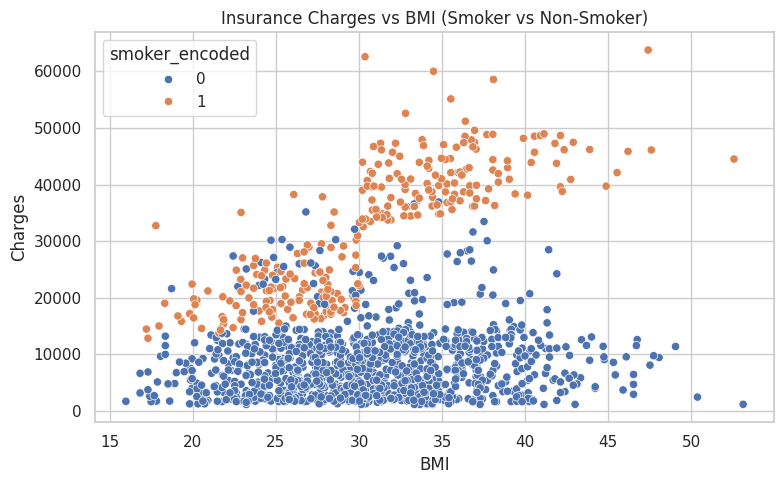

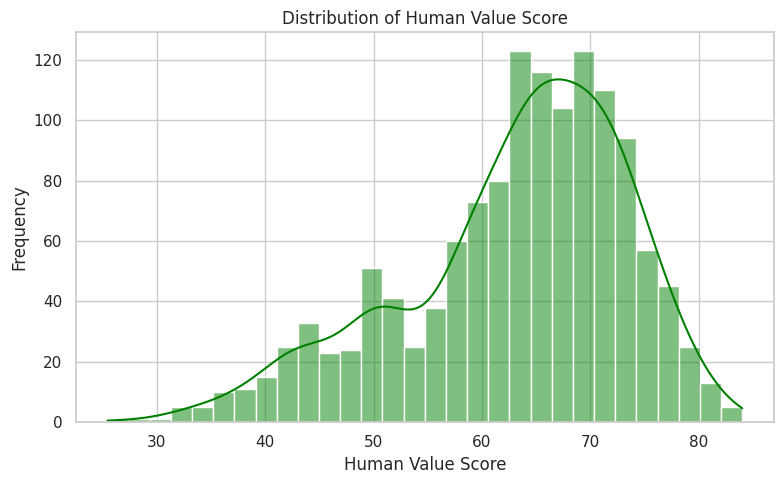

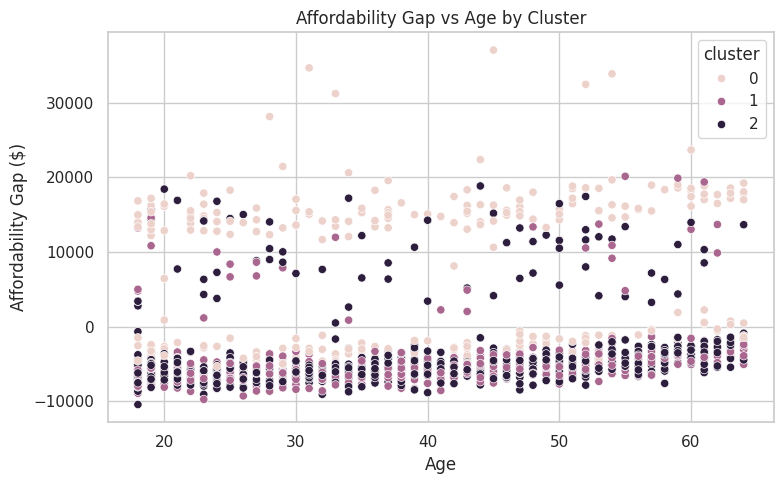

Exported cleaned data with ethical features + clusters.


In [3]:
# ---------------------------------------------
# STEP 0: REQUIRED LIBRARIES
# ---------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ---------------------------------------------
# STEP 1: UPLOAD CSV FILE
# ---------------------------------------------
from google.colab import files
uploaded = files.upload()
filename = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# ---------------------------------------------
# STEP 2: CLEAN AND STRUCTURE DATA
# ---------------------------------------------
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.drop(columns=[col for col in ['index'] if col in df.columns], inplace=True)
df.drop_duplicates(inplace=True)
df.fillna(method='ffill', inplace=True)  # Ockham: default safe fill

# ---------------------------------------------
# STEP 3: ENCODE CATEGORICAL VARIABLES
# ---------------------------------------------
if 'sex' in df.columns and 'sex_encoded' not in df.columns:
    df['sex_encoded'] = df['sex'].map({'male': 1, 'female': 0})
if 'smoker' in df.columns and 'smoker_encoded' not in df.columns:
    df['smoker_encoded'] = df['smoker'].map({'yes': 1, 'no': 0})
if 'region' in df.columns:
    df = pd.get_dummies(df, columns=['region'], drop_first=True)

# ---------------------------------------------
# STEP 4: FEATURE ENGINEERING FOR ETHICAL INSIGHT
# ---------------------------------------------
df['customer_retention_rate'] = np.random.uniform(0.6, 0.99, len(df)).round(2)
df['iul_policy_owner'] = np.random.binomial(1, 0.4, len(df))
df['human_value_score'] = (100 - (df['bmi'] + df['smoker_encoded'] * 20 + df['children'] * 2)).clip(lower=0)
df['predicted_fair_charge'] = df['age'] * 200 + df['bmi'] * 150 + df['smoker_encoded'] * 12000
df['affordability_gap'] = df['charges'] - df['predicted_fair_charge']

# ---------------------------------------------
# STEP 5: DEFINE FEATURES + TARGET
# ---------------------------------------------
features = [
    'age', 'bmi', 'children', 'sex_encoded', 'smoker_encoded',
    'human_value_score', 'customer_retention_rate', 'iul_policy_owner'
]
features = [f for f in features if f in df.columns]
target = 'charges'

# ---------------------------------------------
# STEP 6: MODEL TRAINING
# ---------------------------------------------
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation with clean metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

# ---------------------------------------------
# STEP 7: UNSUPERVISED LEARNING (KMeans Clustering)
# ---------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df['cluster'] = KMeans(n_clusters=3, random_state=42).fit_predict(X_scaled)

# ---------------------------------------------
# STEP 8: VISUAL INSIGHTS
# ---------------------------------------------
sns.set(style='whitegrid')

# Charges vs. BMI (Smoker Highlighted)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker_encoded')
plt.title("Insurance Charges vs BMI (Smoker vs Non-Smoker)")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.tight_layout()
plt.show()

# Human Value Score Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['human_value_score'], bins=30, kde=True, color='green')
plt.title("Distribution of Human Value Score")
plt.xlabel("Human Value Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Affordability Gap vs Age
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='age', y='affordability_gap', hue='cluster')
plt.title("Affordability Gap vs Age by Cluster")
plt.xlabel("Age")
plt.ylabel("Affordability Gap ($)")
plt.tight_layout()
plt.show()

# ---------------------------------------------
# STEP 9: EXPORT CLEANED FILE
# ---------------------------------------------
df.to_csv("cleaned_life_insurance_model.csv", index=False)
print("Exported cleaned data with ethical features + clusters.")
